# Introduction

LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for Least Absolute Shrinkage and Selection Operator.

The primary goal of LASSO regression is to find a balance between model simplicity and accuracy. It achieves this by adding a penalty term to the traditional linear regression model, which encourages sparse solutions where some coefficients are forced to be exactly zero. This feature makes LASSO particularly useful for feature selection, as it can automatically identify and discard irrelevant or redundant variables.

# What is Lasso Regression?

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

Lasso Regression uses L1 regularization technique (will be discussed later in this article). It is used when we have more features because it automatically performs feature selection.

## Here’s a step-by-step explanation of how LASSO regression works:

Linear regression model: LASSO regression starts with the standard linear regression model, which assumes a linear relationship between the independent variables (features) and the dependent variable (target). The linear regression equation can be represented as follows:makefileCopy codey = β₀ + β₁x₁ + β₂x₂ + ... + βₚxₚ + ε Where:

 y is the dependent variable (target).

B₀, β₁, β₂, ..., βₚ are the coefficients (parameters) to be estimated.
x₁, x₂, ..., xₚ are the independent variables (features).
ε represents the error term.

L1 regularization: LASSO regression introduces an additional penalty term based on the absolute values of the coefficients. The L1 regularization term is the sum of the absolute values of the coefficients multiplied by a tuning parameter λ:scssCopy codeL₁ = λ * (|β₁| + |β₂| + ... + |βₚ|) Where:

λ is the regularization parameter that controls the amount of regularization applied.
β₁, β₂, ..., βₚ are the coefficients.

Objective function: The objective of LASSO regression is to find the values of the coefficients that minimize the sum of the squared differences between the predicted values and the actual values, while also minimizing the L1 regularization term:makefileCopy codeMinimize: RSS + L₁ Where:
RSS is the residual sum of squares, which measures the error between the predicted values and the actual values.

Shrinking coefficients: By adding the L1 regularization term, LASSO regression can shrink the coefficients towards zero. When λ is sufficiently large, some coefficients are driven to exactly zero. This property of LASSO makes it useful for feature selection, as the variables with zero coefficients are effectively removed from the model.

Tuning parameter λ: The choice of the regularization parameter λ is crucial in LASSO regression. A larger λ value increases the amount of regularization, leading to more coefficients being pushed towards zero. Conversely, a smaller λ value reduces the regularization effect, allowing more variables to have non-zero coefficients.

Model fitting: To estimate the coefficients in LASSO regression, an optimization algorithm is used to minimize the objective function. Coordinate Descent is commonly employed, which iteratively updates each coefficient while holding the others fixed.

LASSO regression offers a powerful framework for both prediction and feature selection, especially when dealing with high-dimensional datasets where the number of features is large. By striking a balance between simplicity and accuracy, LASSO can provide interpretable models while effectively managing the risk of overfitting.


## formula for lasso regression :

y = w0 + w1*x1 + w2*x2 + ... + wn*xn + α * Σ|wi|


## formula for ridge  regression :

y = w0 + w1*x1 + w2*x2 + ... + wn*xn + α * Σ|wi| ** 2


In [49]:
from sklearn.datasets import load_diabetes

import pandas as pd 
import numpy as  np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [31]:
data = load_diabetes()

df = pd.DataFrame(data.data , columns=data.feature_names)
df['TARGET'] = data.target

In [32]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [33]:
X_train , X_test  , y_train , y_test = train_test_split(data.data , data.target , test_size = 0.2 ,random_state = 42)

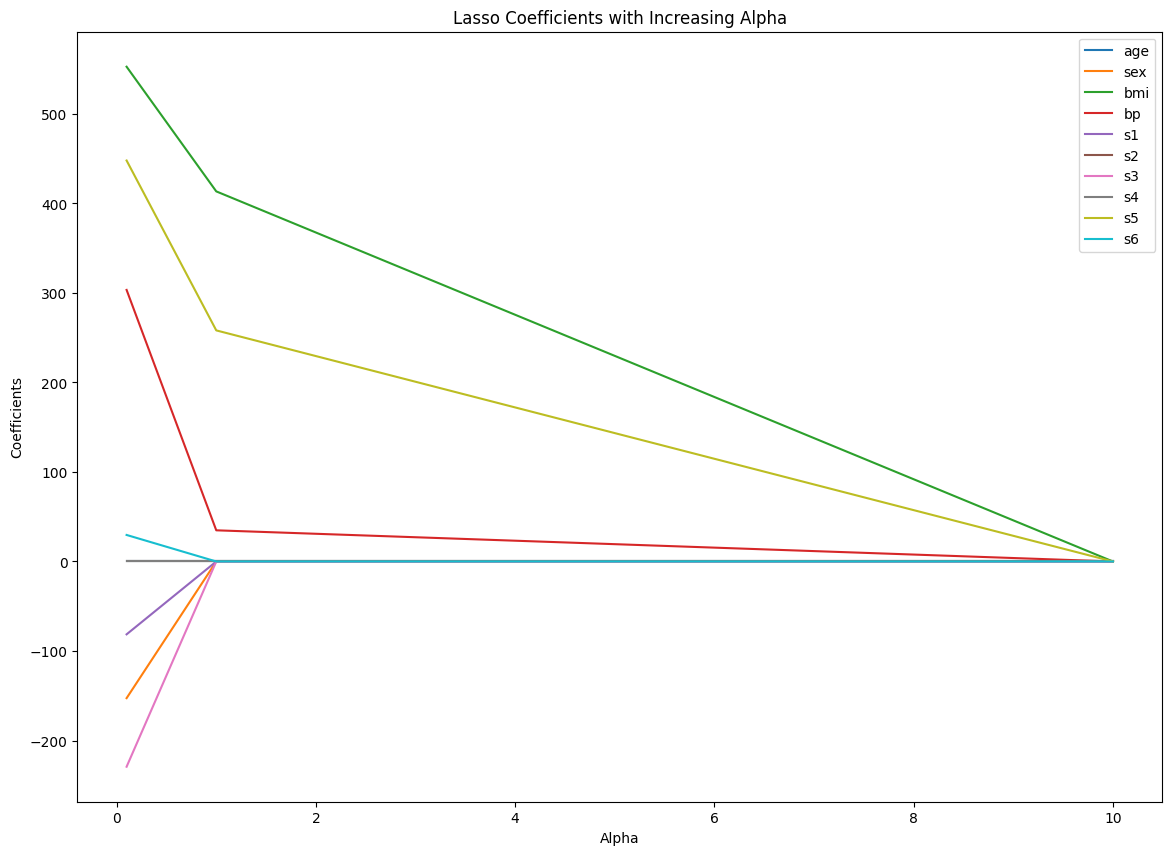

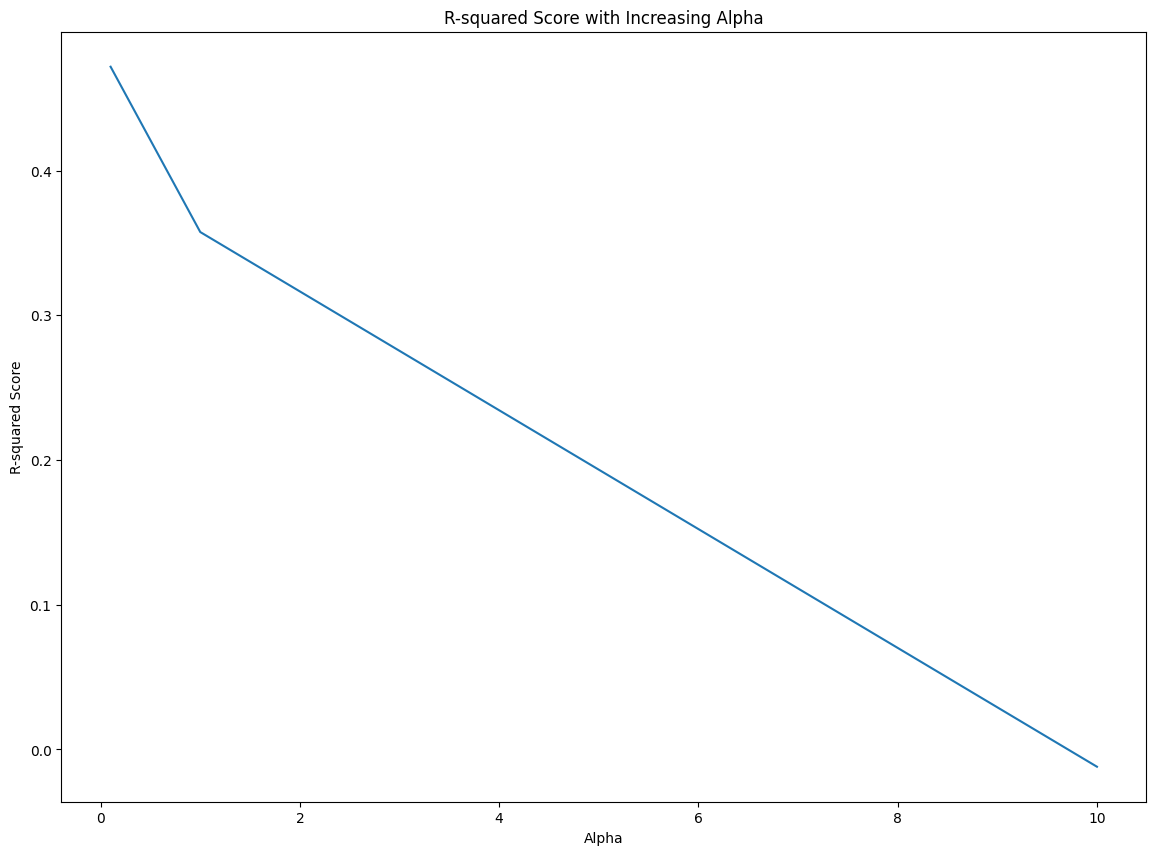

In [57]:
coef = []
r2_scores = []
bias = []
alpha = [0.1, 1, 10]

for a in alpha:
    lasso_reg = Lasso(alpha=a)
    lasso_reg.fit(X_train, y_train)
    coef.append(lasso_reg.coef_.tolist())
    y_pred_lass = lasso_reg.predict(X_test)
    r2_scores.append(lasso_reg.score(X_test, y_test))

# Plotting Coefficients
plt.figure(figsize=(14, 10))
plt.plot(alpha, coef)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.legend(data.feature_names)
plt.title('Lasso Coefficients with Increasing Alpha')
plt.show()

# Plotting R-squared Scores
plt.figure(figsize=(14, 10))
plt.plot(alpha, r2_scores)
plt.xlabel('Alpha')
plt.ylabel('R-squared Score')
plt.title('R-squared Score with Increasing Alpha')
plt.show()

## we can see that with increasing alpha the Coefficients is nearing zero 

## and increasing alpha decreases r2_score as well 